# Utilisation du modèle
Ce *notebook* illustre l'exploitation des données collectées lors du projet. Nous utiliserons une librairie python (3.7) implémenté à cette occasion.
        

In [4]:
# Importation de la lib
import python_aep_lib.agents as agents
import python_aep_lib.agressors as agressors
import python_aep_lib.network

# Importation de la fonction d'affichage de IPython
from IPython.display import Image


## Concepts de modélisation
L'approche choisie pour le projet est de *comprendre* le système par les **Processus** et de l'*explorer* (au moins dans un premier temps) par des concepts experts liés aux **Agents**.

Ce modèle suit une philosophie [mécaniste](https://fr.wikipedia.org/wiki/M%C3%A9canisme_(philosophie)) : les **Processus** sont les 'atomes fonctionels' tandis que les **Agents** sont les entités dignes d'intêret / observables / mesurables.

## Exploration

### Trouver un Agent

Le premier point d'entrée pour l'exploration du graphe est par un **Agent**. C'est une entité plus ou moins abstraite décrivant le ou les aspects d'une entité physique d'intérêt, comme la vigne, les oiseaux ou encore la pluie.

In [5]:
agentHelper = agents.AgentHelper()
# On ne prend que le premier élément car le retour de n'importe quelle fonction de recherche renvoie plusieurs résultats.
vigne = agentHelper.findAgent('vigne')


print(vigne)

[{'id': (_6778:LS_Agent {name: 'Mildiou de la vigne Plasmopara viticola', uri: 'http://lod.nal.usda.gov/nalt/58726'}), 'subpart': [(_6779:LS_Agent {name: 'Plasmopara viticola gametocyste femelle, oogone ', uri: ''}), (_6780:LS_Agent {name: 'Plasmopara viticola gametocyste male, spermatocyste ', uri: ''}), (_6781:LS_Agent {name: 'Plasmopara viticola mycelium ', uri: ''}), (_6782:LS_Agent {name: 'Plasmopara viticola oospore ', uri: ''}), (_6783:LS_Agent {name: 'Plasmopara viticola sporocyste ', uri: ''}), (_6784:LS_Agent {name: 'Plasmopara viticola sporocystophore ', uri: ''}), (_6785:LS_Agent {name: 'Plasmopara viticola zoospore ', uri: ''})]}, {'id': (_6819:LS_Agent_PP {name: 'Vigne Vitis vinifera', uri: 'http://lod.nal.usda.gov/nalt/38684'}), 'subpart': [(_6813:LS_Agent {name: 'Vigne tronc', uri: ''}), (_6811:LS_Agent {name: 'Vigne grappe', uri: ''}), (_6812:LS_Agent {name: 'Vigne rameaux', uri: ''}), (_6808:LS_Agent {name: 'Vigne bouton floral', uri: ''}), (_6809:LS_Agent {name: 'Vig

Ici, la clé de dictionnaire 'id' référence le noeud *racine* pour la relation/prédicat/arrête 'partie de'. Voir ci dessous.

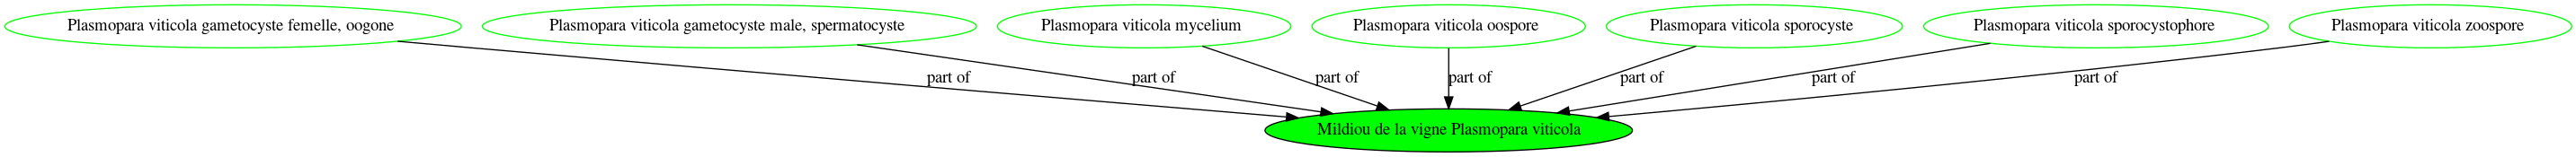

In [6]:
pydot_graph = python_aep_lib.network.drawAgent(vigne[0])

# render pydot by calling dot, no file saved to disk
png_str = pydot_graph.create_png(prog='dot')
Image(png_str)


### Trouver les agresseurs

Une fois un **agent** choisi, on peut s'intéresser à la liste de ses agresseurs, c'est à dire des **agents** qui sont impliqués dans un **Processus** le dégradant.

In [9]:
agressorHelper = agressors.AgressorHelper()
agressorsList = agressorHelper.findAgressors(vigne[1])

# On affiche juste le nom de l'entité 'englobante'
for x in agressorsList['agressors']:
    print(x['id']['name'])

Diplodia seriata
Eutypa lata
Fomitiporia mediterranea
Neofusicoccum parvum
Phaeomoniella chlamydospora
Phaeoacremonium minima
Stereum hirsutum
Mildiou de la vigne Plasmopara viticola
Lobesia botrana
Eupoecilla ambiguella


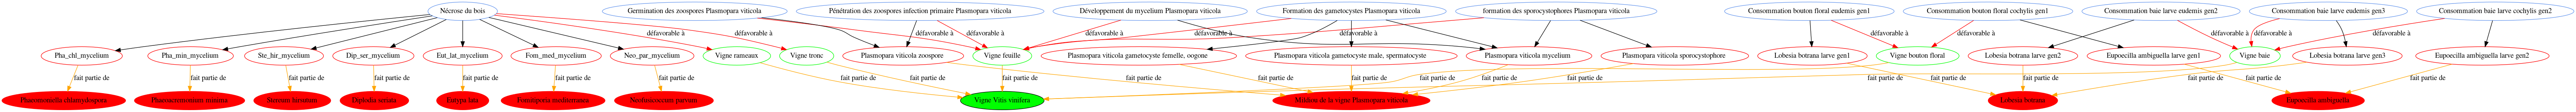

In [10]:
# On peut aussi afficher le sous graphe réponse
png_str = agressorHelper.graphBuffer.create_png(prog='dot')
Image(png_str)

### Extraire le cycle de vie

Une fois un **agent** choisi, on peut également extraire son *cycle de vie*, c'est à dire les **Processus** avec une dépendance qui impliquent les sous-partie de notre **Agent**.

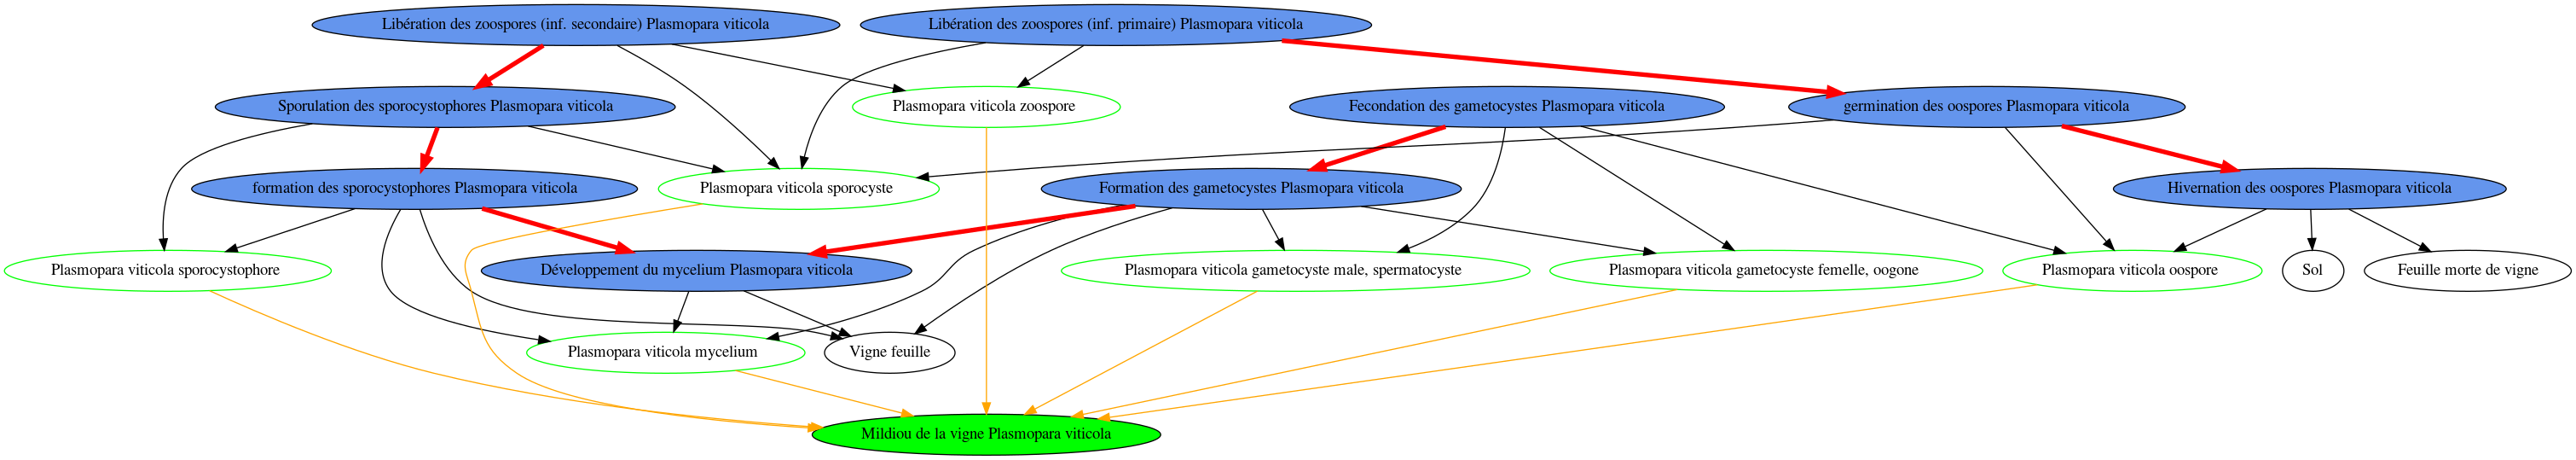

In [11]:
# Trouver le cycle d'un (bio)agresseur de la vigne

# Ici on s'interrge sur le cycle de vie de 'premier' agresseur de la vigne (il s'agit de Eupoccilla ambiguella, en vert dans le graphique)
agentHelper.getCycle(agressorsList['agressors'][7])
png_str = agentHelper.graphBuffer.create_png(prog='dot')
Image(png_str)


### Trouver les moyens de lutte direct

Un moyen de lutte direct est identifié par un **Processus** impactant directement l'**Agent** cible et dans lequel l'**agriculteur** est *impliqué*.

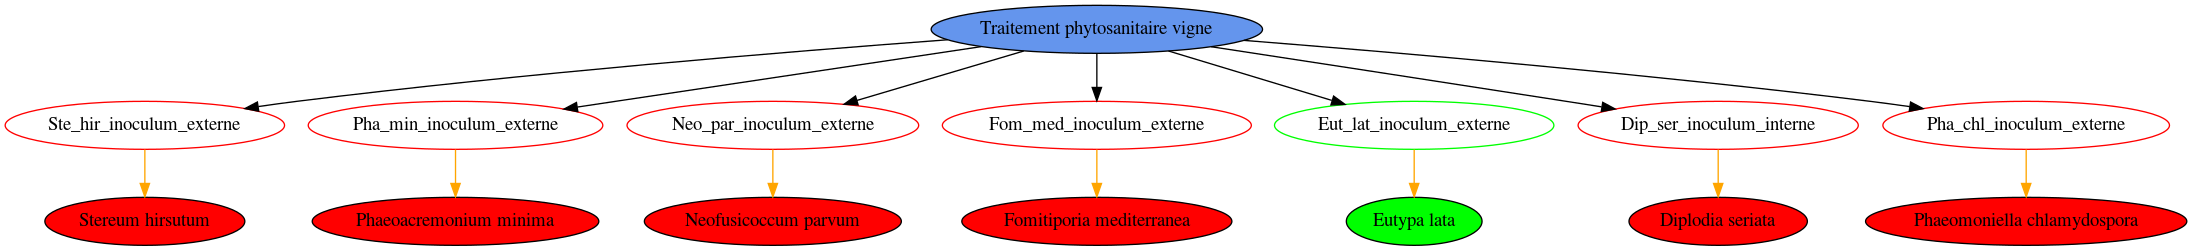

In [12]:
# Trouver les moyens de lutte direct contre le deuxième (bio)agresseur de la vigne (il s'agit du Eupocilla ambiguella, en vert dans le graphique)

agentHelper.findDirectAction(agressorsList['agressors'][1])
png_str = agentHelper.graphBuffer.create_png(prog='dot')
Image(png_str)

### Trouver les moyens de lutte indirect

Un *moyen de lutte indirect* est défini par un **Processus** qui *favorise* un agresseur de l'**Agent** cible. 

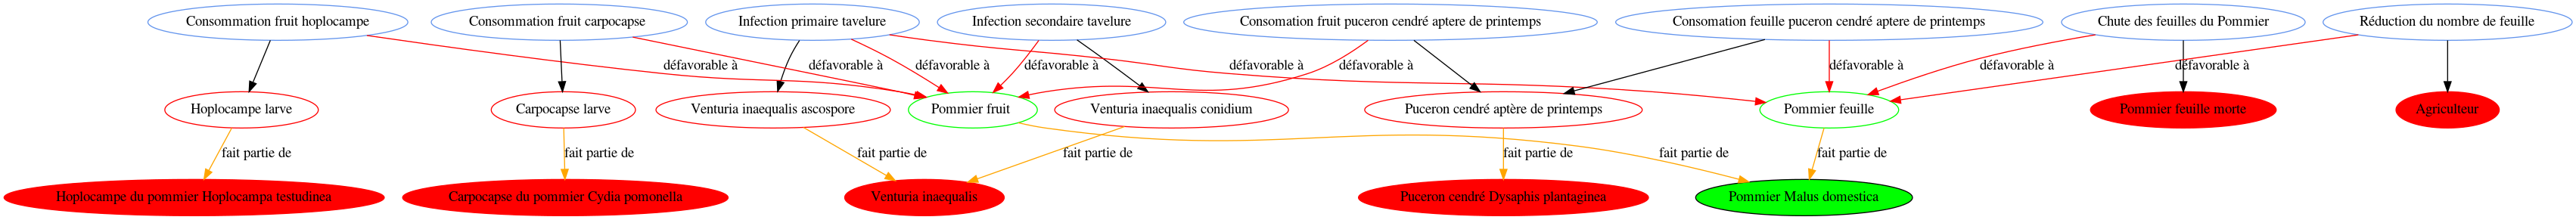

In [13]:
# Pour trouver des auxiliaires, nous devons nous placer du 'point de vue' du pommier

pommier = agentHelper.findAgent('pommier')[0]
agressorsList = agressorHelper.findAgressors(pommier)

png_str = agressorHelper.graphBuffer.create_png(prog='dot')
Image(png_str)

[{'processus': (_7730:LS_Processus {name: 'Predation de carpocapse par les oiseaux', uri: ''}), 'agents': [(_6767:LS_Agent {name: 'Oiseau', uri: ''}), (_6672:LS_Agent {name: 'Carpocapse larve', uri: ''})]}, {'processus': (_7688:LS_Processus {name: 'Parasitisme larve carpocapse par Beauvaria bassiana', uri: ''}), 'agents': [(_6672:LS_Agent {name: 'Carpocapse larve', uri: ''}), (_6647:LS_Agent {name: 'Beauveria bassiana', uri: 'http://lod.nal.usda.gov/nalt/16245'})]}]


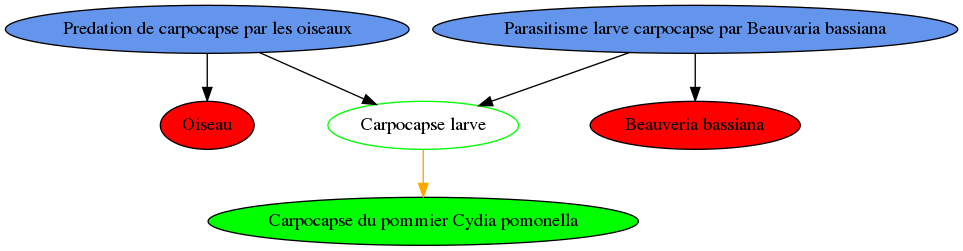

In [41]:
# On peut bien sur combiner les fonctions pour demander quelles sont les moyen d'action indirect contre le Carpocapse par exemple
print(agentHelper.findIndirectAction(agentHelper.findAgent('Carpocapse')[0]))

png_str = agentHelper.graphBuffer.create_png(prog='dot')
Image(png_str)

 ### Trouver les auxiliaires
 
 Un auxiliaire est définit comme étant un **Agent** impliqué dans un moyen de **lutte indirect** contre l'agresseur d'un **Agent** cible.

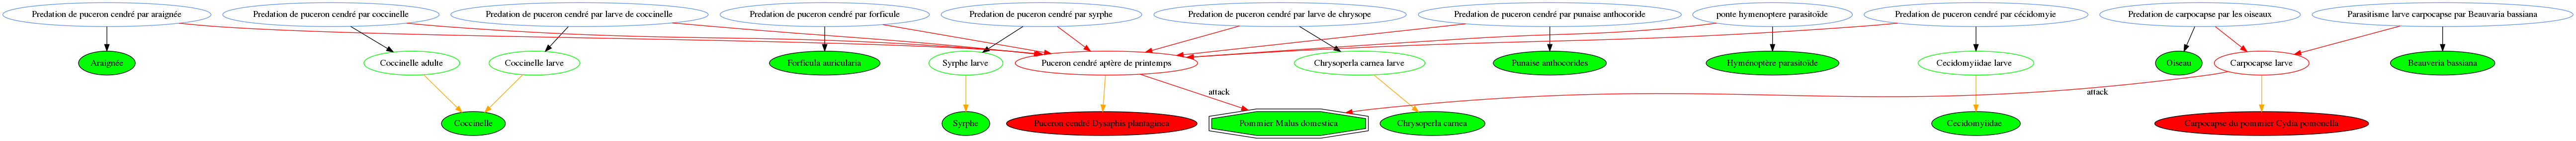

In [10]:
agressorHelper.findAuxiliary(pommier)

png_str = agressorHelper.graphBuffer.create_png(prog='dot')
Image(png_str)

In [11]:
puceron = agentHelper.findAgent('puceron')[0]
agentHelper.findIndirectAction(puceron)


[{'processus': (_7727:LS_Processus {name: 'Predation de puceron cendr\u00e9 par larve de coccinelle', uri: ''}),
  'agents': [(_6668:LS_Agent {name: 'Coccinelle larve', uri: ''}),
   (_6700:LS_Agent {name: 'Puceron cendr\u00e9 apt\u00e8re de printemps', uri: ''})]},
 {'processus': (_7712:LS_Processus {name: 'ponte hymenoptere parasito\u00efde', uri: ''}),
  'agents': [(_6700:LS_Agent {name: 'Puceron cendr\u00e9 apt\u00e8re de printemps', uri: ''}),
   (_6737:LS_Agent {name: 'Hym\u00e9nopt\u00e8re parasito\u00efde', uri: ''})]},
 {'processus': (_7724:LS_Processus {name: 'Predation de puceron cendr\u00e9 par araign\u00e9e', uri: ''}),
  'agents': [(_6644:LS_Agent {name: 'Araign\u00e9e', uri: 'http://lod.nal.usda.gov/nalt/5100'}),
   (_6700:LS_Agent {name: 'Puceron cendr\u00e9 apt\u00e8re de printemps', uri: ''})]},
 {'processus': (_7726:LS_Processus {name: 'Predation de puceron cendr\u00e9 par larve de chrysope', uri: ''}),
  'agents': [(_6657:LS_Agent {name: 'Chrysoperla carnea larve', 

## Travaux pratique et utilisation

Cette partie permet de comprendre le fonctionnement et l'utilisation de la bibiothèque poru des cas plus pratique. Il s'agira donc de bien transcrire notre intentation en code python, en utilisant les notions vu précédemment. 

### Moyen d'action direct contre les bioagresseurs de la vigne

Le but de cette première partie est de trouver tous les moyens d'action direct listé dans la base qui permettent d'agir contre les bioagresseurs de la vigne.
La forme du résultat sera un tableau associatif (ou dictionnaire) qui contient pour chaque nom de processus les noms de bioagresseurs de la vigne sur lequel il agit.


In [55]:
# Trouver un moyen de lutte indirect commun à deux bioagresseurs parmis les bioagresseurs de la vigne et du pommier

# On identifie les agents
vigne = agentHelper.findAgent('vigne+tronc')[0]

print('\nAffichage de la vigne pour l\'outil\n')
print(vigne)
# Puis leur agresseurs respectifs
agressorsVigne = agressorHelper.findAgressors(vigne)

# print('\nAffichage des agresseurs de la vigne\n')
# for x in agressorsVigne['agressors']:
    # print(x['id']['name'])
# print('\nAffichage des agresseurs du pommier\n')
# for x in agressorsPommier['agressors']:
    # print(x['id']['name'])
    
print('\nRecherche d\'un moyen d\'action direct qui impacterais plusieurs bioagresseurs de la vigne\n')
listAgressorsPerProcessus =  dict()
for x in agressorsVigne['agressors']:
    listDirectAction_X_processus = agentHelper.findDirectAction(x)
    for direct_action in listDirectAction_X_processus:
        # print(direct_action['processus']['name'])
        if direct_action['processus']['name'] not in listAgressorsPerProcessus:
            listAgressorsPerProcessus[direct_action['processus']['name']] = set()
        for bioagressor in direct_action['agents']:
            # Add all root agent of every bioagressor into the set
            # print(x)
            # print(agentHelper.rootAgentIdentityBindings[x['id']['name']])
            # print(agentHelper.rootAgentIdentityBindings[bioagressor['name']])
            if agentHelper.rootAgentIdentityBindings[x['id']['name']] == agentHelper.rootAgentIdentityBindings[bioagressor['name']]:
                listAgressorsPerProcessus[direct_action['processus']['name']].update([ agentHelper.rootAgentIdentityBindings[bioagressor['name']]['id']['name'] ])
print(listAgressorsPerProcessus)    



Affichage de la vigne pour l'outil

{'id': (_6819:LS_Agent_PP {name: 'Vigne Vitis vinifera', uri: 'http://lod.nal.usda.gov/nalt/38684'}), 'subpart': [(_6813:LS_Agent {name: 'Vigne tronc', uri: ''}), (_6811:LS_Agent {name: 'Vigne grappe', uri: ''}), (_6812:LS_Agent {name: 'Vigne rameaux', uri: ''}), (_6808:LS_Agent {name: 'Vigne bouton floral', uri: ''}), (_6809:LS_Agent {name: 'Vigne feuille', uri: ''}), (_6807:LS_Agent {name: 'Vigne baie', uri: ''})]}

Recherche d'un moyen d'action direct qui impacterais plusieurs bioagresseurs de la vigne

{'Traitement phytosanitaire vigne': {'Fomitiporia mediterranea', 'Neofusicoccum parvum', 'Phaeoacremonium minima', 'Phaeomoniella chlamydospora', 'Eutypa lata', 'Stereum hirsutum', 'Diplodia seriata'}, 'Epandage de Bacillus thuringiensis': {'Eupoecilla ambiguella', 'Lobesia botrana'}}
